In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [395]:
df=pd.read_csv("shanichar bazar.csv")
df.head()

,date,population
0,03-01-2022,14
1,19-02-2022,10
2,22-03-2022,7
3,06-05-2022,8
4,16-06-2022,8


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9 non-null      object
 1   population  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [397]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [398]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-398-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [399]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [400]:
 from prophet import Prophet

In [401]:
population=df.groupby('date')['population'].sum().reset_index()

In [402]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [403]:
model=Prophet(interval_width=0.95)

In [404]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/k5a9p2_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/c7_w20jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54857', 'data', 'file=/tmp/tmpqki2d_87/k5a9p2_o.json', 'init=/tmp/tmpqki2d_87/c7_w20jn.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelc81wvpki/prophet_model-20230421071715.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:17:15 - cmdstanpy - INFO - Chain [1] start processing
INF

In [405]:
future_dates=model.make_future_dataframe(periods=30)

In [406]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-12  10.689282    3.646937   17.085594    10.689282    10.689282   
1  2022-02-19  10.612067    3.749598   17.079575    10.612067    10.612067   
2  2022-03-01  10.591747    4.629343   17.804791    10.591747    10.591747   
3  2022-03-22  10.549076    3.322894   17.752134    10.549076    10.549076   
4  2022-06-05  10.396677    3.650628   17.272248    10.396677    10.396677   
5  2022-06-16  10.374326    3.423549   17.623334    10.374326    10.374326   
6  2022-08-08  10.266631    2.965072   17.404787    10.266631    10.266631   
7  2022-09-29  10.160968    2.798623   17.624611    10.160968    10.160968   
8  2023-11-02   9.350210    2.777127   16.272869     9.350210     9.350210   
9  2023-11-03   9.348178    2.391096   16.282035     9.348178     9.348178   
10 2023-11-04   9.346146    1.980263   16.362534     9.346146     9.346146   
11 2023-11-05   9.344114    2.372000   16.510413     9.344114   

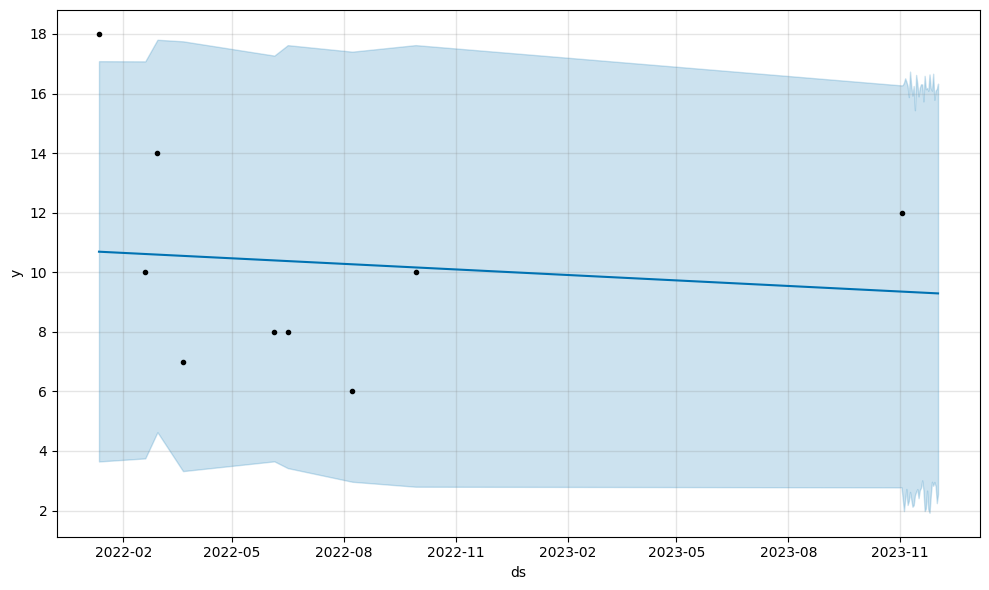

In [407]:
model.plot(forecast)
print(forecast)

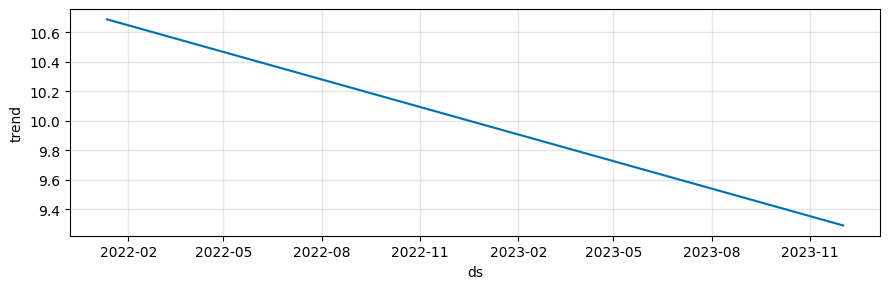

In [408]:
component=model.plot_components(forecast)

In [409]:
 model1=Prophet(interval_width=0.95)

In [410]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/abfymdll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/nsey8c3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26256', 'data', 'file=/tmp/tmpqki2d_87/abfymdll.json', 'init=/tmp/tmpqki2d_87/nsey8c3n.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modeldxvv89di/prophet_model-20230421071729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:17:29 - cmdstanpy - INFO - Chain [1] start processing
INF

In [411]:
future_dates=model1.make_future_dataframe(periods=10)

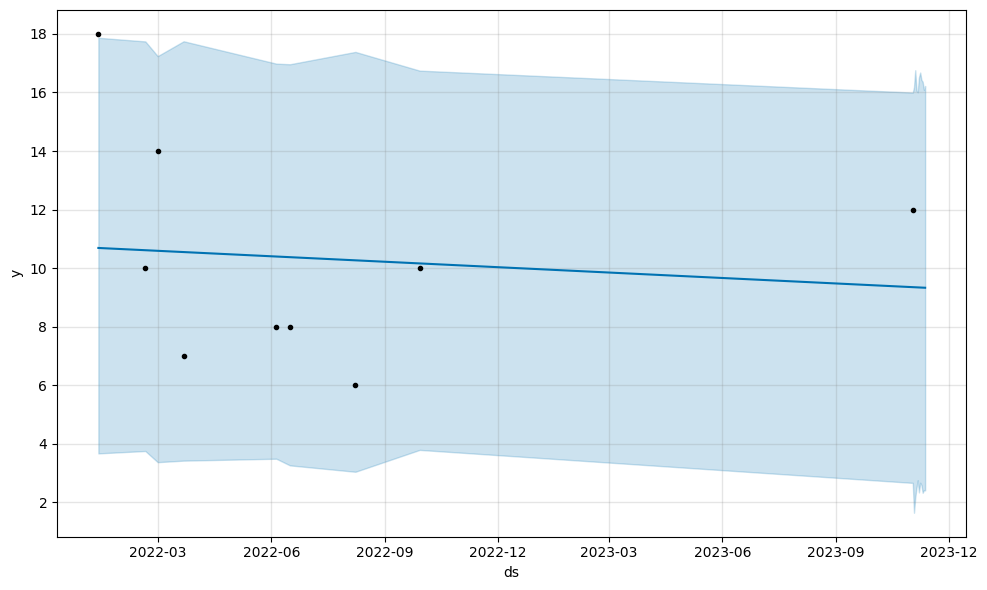

In [412]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-12  10.689282    3.671417   17.869507    10.689282    10.689282   
1  2022-02-19  10.612067    3.753088   17.744841    10.612067    10.612067   
2  2022-03-01  10.591747    3.371644   17.242737    10.591747    10.591747   
3  2022-03-22  10.549076    3.424022   17.750026    10.549076    10.549076   
4  2022-06-05  10.396677    3.489368   16.985605    10.396677    10.396677   
5  2022-06-16  10.374326    3.262142   16.964725    10.374326    10.374326   
6  2022-08-08  10.266631    3.043414   17.386528    10.266631    10.266631   
7  2022-09-29  10.160968    3.790684   16.746766    10.160968    10.160968   
8  2023-11-02   9.350210    2.663893   15.997687     9.350210     9.350210   
9  2023-11-03   9.348178    1.642886   16.183125     9.348178     9.348178   
10 2023-11-04   9.346146    2.157982   16.760767     9.346146     9.346146   
11 2023-11-05   9.344114    2.494486   16.074332     9.344114   

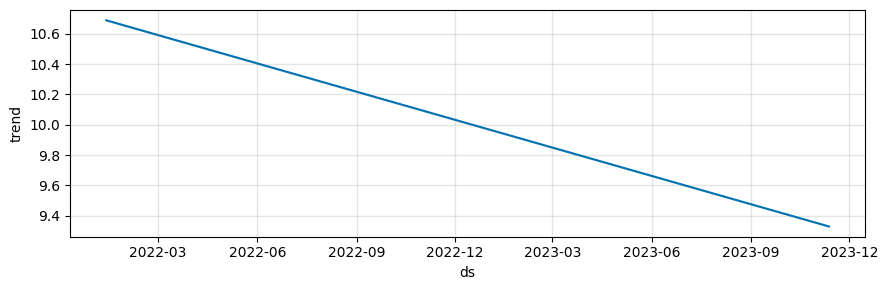

In [413]:
week=model1.plot_components(forecasting)
print(forecasting)